In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
ids = df_test['Id'].values
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

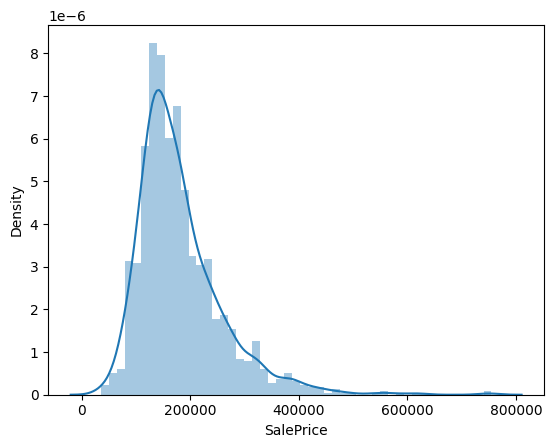

In [23]:
sns.distplot(df_train['SalePrice'])

In [24]:
y_train = df_train.SalePrice.values
x_train = df_train.drop('SalePrice', 1)

In [25]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [26]:
x_train = x_train.drop((missing_data[missing_data['Total'] > 81]).index,1)
x_train = x_train.apply(lambda x:x.fillna(x.value_counts().index[0]))
x_train.isnull().sum().max()

0

In [75]:
x_train.dtypes

MSSubClass       int64
MSZoning         int32
LotArea          int64
Street           int32
LotShape         int32
                 ...  
MiscVal          int64
MoSold           int64
YrSold           int64
SaleType         int32
SaleCondition    int32
Length: 73, dtype: object

In [28]:
df_test = df_test.drop((missing_data[missing_data['Total'] > 81]).index,1)
df_test = df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [29]:
x_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

In [30]:
x_train.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [77]:
X_val.dtypes

MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 73, dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
cols = x_train.select_dtypes(include='object').columns

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(x_train[c].values)) 
    x_train[c] = lbl.transform(list(x_train[c].values))
    df_test[c] = lbl.transform(list(df_test[c].values))

print('Shape all_data: {}'.format(x_train.shape))

Shape all_data: (1460, 73)


In [42]:
indexes = x_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index 

X_train = x_train.drop(indexes)
Y_train = np.delete(y_train, indexes)

In [33]:
y_train.shape

(1458,)

In [34]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [41]:
Y_val=pd.read_csv('./AmesHousing.csv')
X_val=pd.read_csv('./test.csv')

In [16]:
model_xgb = xgb.XGBRegressor(n_estimators=2200)

In [17]:
n_folds = 5

def rmsle(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))
model_xgb.fit(X_train, Y_train)
xgb_pred = model_xgb.predict(X_val)
print(rmsle(Y_val, xgb_pred))

0.15794628017015785


In [65]:
for i in set(X_val.columns).difference(set(X_train.columns)):
    X_val.pop(i)

In [69]:
len(X_val.columns)

73

In [73]:
model_xgb = xgb.XGBRegressor(reg_lambda=0.8571, n_estimators=2200, nthread = -1)
model_xgb.fit(X_train, Y_train)
xgb_pred = model_xgb.predict(X_val)
print(rmsle(Y_val, xgb_pred)) 

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:MSZoning: object, Street: object, LotShape: object, LandContour: object, Utilities: object, LotConfig: object, LandSlope: object, Neighborhood: object, Condition1: object, Condition2: object, BldgType: object, HouseStyle: object, RoofStyle: object, RoofMatl: object, Exterior1st: object, Exterior2nd: object, MasVnrType: object, ExterQual: object, ExterCond: object, Foundation: object, BsmtQual: object, BsmtCond: object, BsmtExposure: object, BsmtFinType1: object, BsmtFinType2: object, Heating: object, HeatingQC: object, CentralAir: object, Electrical: object, KitchenQual: object, Functional: object, GarageType: object, GarageFinish: object, GarageQual: object, GarageCond: object, PavedDrive: object, SaleType: object, SaleCondition: object

In [74]:
import catboost as cb
from catboost import Pool
from sklearn.model_selection import train_test_split


model_cb = cb.CatBoostRegressor(loss_function='RMSE', verbose = False)
model_cb.fit(X_train, Y_train)
cb_pred = model_cb.predict(X_val)
print(rmsle(Y_val, cb_pred))

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]="RH": Cannot convert 'b'RH'' to float